In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

# reading dataset
df = pd.read_csv("./Crop_Recommendation.csv")
df.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,Rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,Rice


In [4]:
df.info

<bound method DataFrame.info of       Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        Rainfall    Crop  
0     202.935536    Rice  
1     226.655

In [5]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [6]:
df['Crop'].value_counts()

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: Crop, dtype: int64

In [7]:
corr = df.corr(numeric_only=True)
corr

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

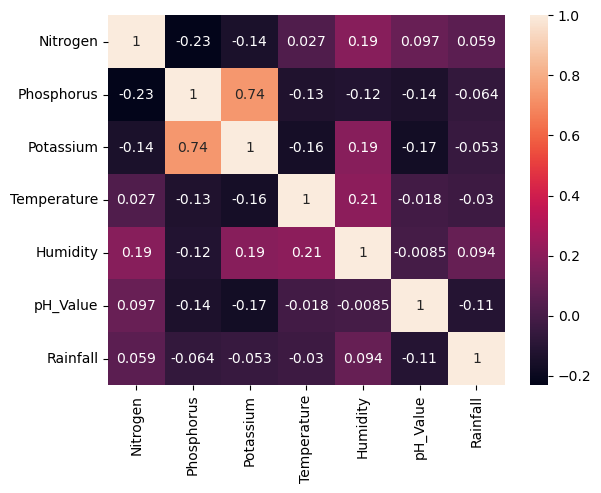

In [8]:
sns.heatmap(corr, annot=True)


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
encoder = LabelEncoder()
y = df['Crop']
y = encoder.fit_transform(y)

In [11]:
!pip install optree

Defaulting to user installation because normal site-packages is not writeable


In [12]:
pip install optree

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [15]:
!pip install optree

Defaulting to user installation because normal site-packages is not writeable


In [16]:
X = df.drop(['Crop'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, verbose=1)

Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1014 - loss: 2.9723 - val_accuracy: 0.3455 - val_loss: 2.0750
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5758 - loss: 1.7884 - val_accuracy: 0.5091 - val_loss: 1.5590
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7700 - loss: 1.2811 - val_accuracy: 0.7795 - val_loss: 1.1913
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8587 - loss: 0.9741 - val_accuracy: 0.8409 - val_loss: 0.9070
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8948 - loss: 0.7378 - val_accuracy: 0.8773 - val_loss: 0.7755
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9137 - loss: 0.5963 - val_accuracy: 0.8705 - val_loss: 0.6645
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.4601 - val_accuracy: 0.9182 - val_loss: 0.5633
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9448 - loss: 0.3895 - val_accuracy: 0.9136 - v

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0584 - val_accuracy: 0.9545 - val_loss: 0.0934
Epoch 52/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.0591 - val_accuracy: 0.9614 - val_loss: 0.1129
Epoch 53/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0470 - val_accuracy: 0.9432 - val_loss: 0.1506
Epoch 54/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.0574 - val_accuracy: 0.9455 - val_loss: 0.1365
Epoch 55/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.0640 - val_accuracy: 0.9705 - val_loss: 0.0792
Epoch 56/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.0515 - val_accuracy: 0.9682 - val_loss: 0.0726
Epoch 57/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0465 - val_accuracy: 0.9545 - val_loss: 0.1058
Epoch 58/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0661 - val_accuracy: 0.9705 - val_lo

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0427 - val_accuracy: 0.9727 - val_loss: 0.0876
Epoch 102/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0543 - val_accuracy: 0.9591 - val_loss: 0.1228
Epoch 103/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0440 - val_accuracy: 0.9773 - val_loss: 0.0536
Epoch 104/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9838 - loss: 0.0376 - val_accuracy: 0.9614 - val_loss: 0.0976
Epoch 105/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0357 - val_accuracy: 0.9864 - val_loss: 0.0460
Epoch 106/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0280 - val_accuracy: 0.9523 - val_loss: 0.0983
Epoch 107/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0306 - val_accuracy: 0.9818 - val_loss: 0.0642
Epoch 108/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0320 - val_accuracy: 0.9818 -

In [21]:
loss,accuracy=model.evaluate(X_test,y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0665 


In [22]:
accuracy

0.9750000238418579

In [23]:
tahmin=model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [24]:
model.save('model.h5')

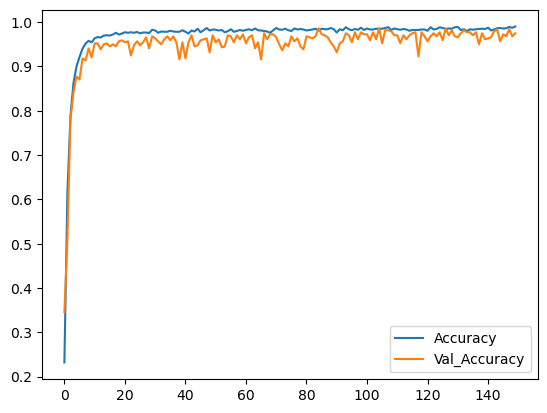

In [25]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

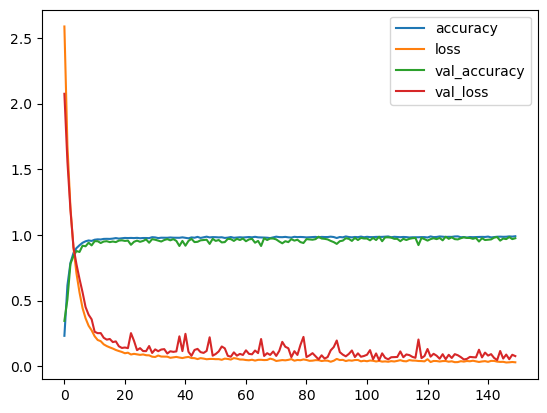

In [26]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [27]:
# Function to predict the crop based on provided parameters
def predict_crop(parameters):
    # Convert parameters to DataFrame
    param_df = pd.DataFrame([parameters], columns=X.columns)
    
    # Make prediction
    prediction = model.predict(param_df)
    
    # Get the index of the highest probability
    predicted_label = np.argmax(prediction, axis=1)
    
    # Convert label back to original crop name
    crop_name = encoder.inverse_transform(predicted_label)
    
    return crop_name[0]

# Example parameters (Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, Rainfall)
example_parameters = {
    'Nitrogen': 90,
    'Phosphorus': 42,
    'Potassium': 43,
    'Temperature': 20.879744,
    'Humidity': 82.002744,
    'pH_Value': 6.502985,
    'Rainfall': 202.935536
}

# Predict the crop
predicted_crop = predict_crop(example_parameters)
print(f"The predicted crop is: {predicted_crop}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted crop is: Rice
